# 1. Load Python packages and data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
logins = pd.read_json('logins.json')

In [4]:
logins.info()
logins.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


# 2. Problem Statement

> ### Part 1 ‐ Exploratory data analysis

> The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [19]:
agg_logins = logins.resample('15T', on='login_time').count()
agg_logins.rename(columns={'login_time': 'logins'}, inplace=True)
agg_logins

,logins
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


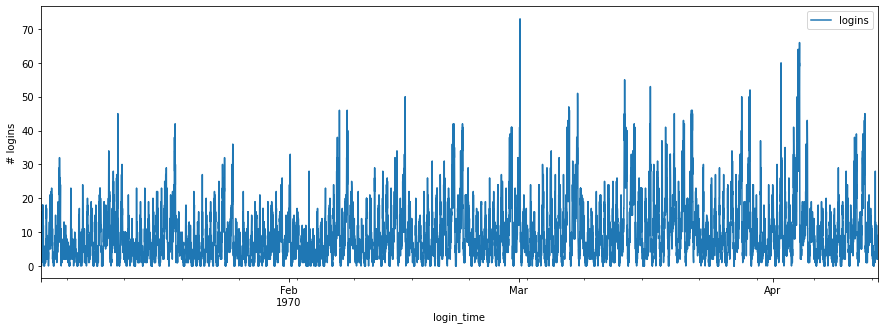

In [86]:
agg_logins.plot(y='logins', figsize=(15,5))
plt.ylabel('# logins')
plt.show()

## 2.1 Let's look for patterns

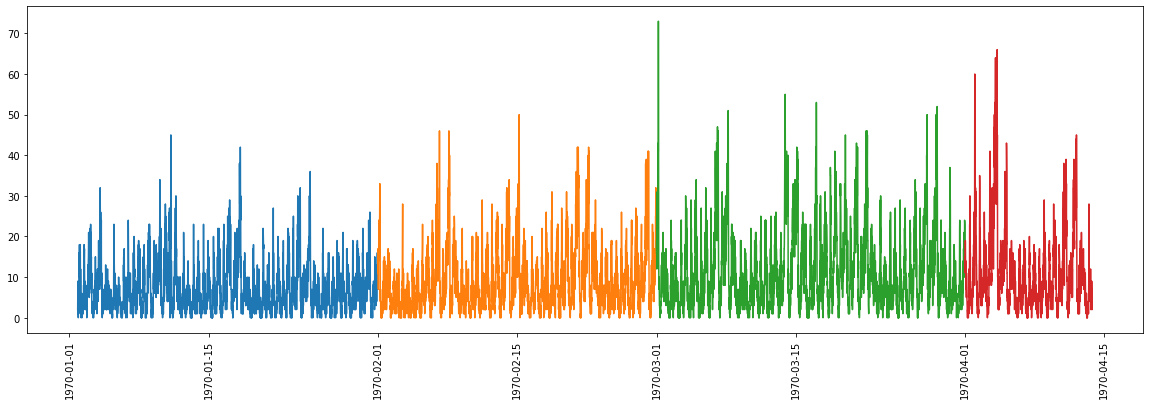

In [103]:
plt.figure(figsize=(20, 6))

groups = agg_logins.groupby(pd.Grouper(freq='M'))
for g in groups:
    plt.plot(g[1])
plt.xticks(rotation=90)
plt.show()

Nothing much on the monthly level, except you can see about 4 spots of daylight in the bottom of each monthly plot.  Looks like a weekly pattern.  Let's look.

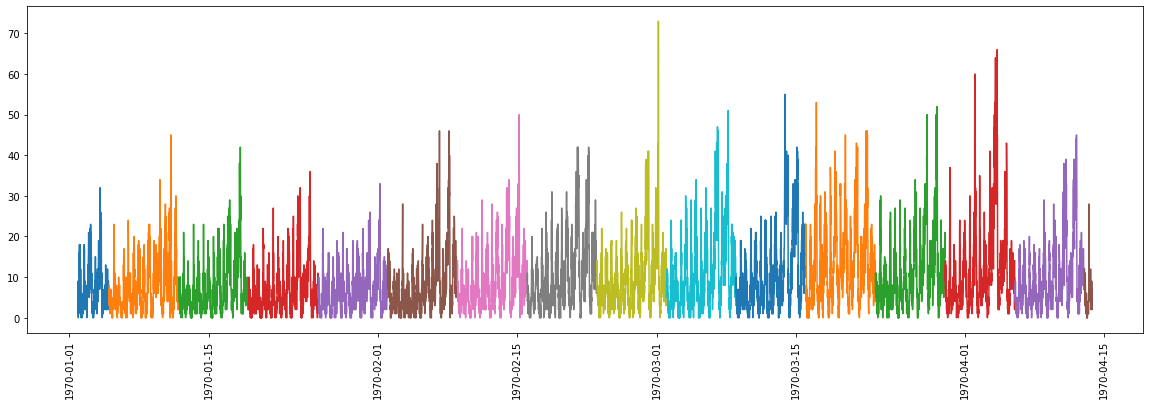

In [102]:
plt.figure(figsize=(20, 6))
groups = agg_logins.groupby(pd.Grouper(freq='W'))
for g in groups:
    plt.plot(g[1])
plt.xticks(rotation=90)
plt.show()

Logins seem to increase toward the end of each week.

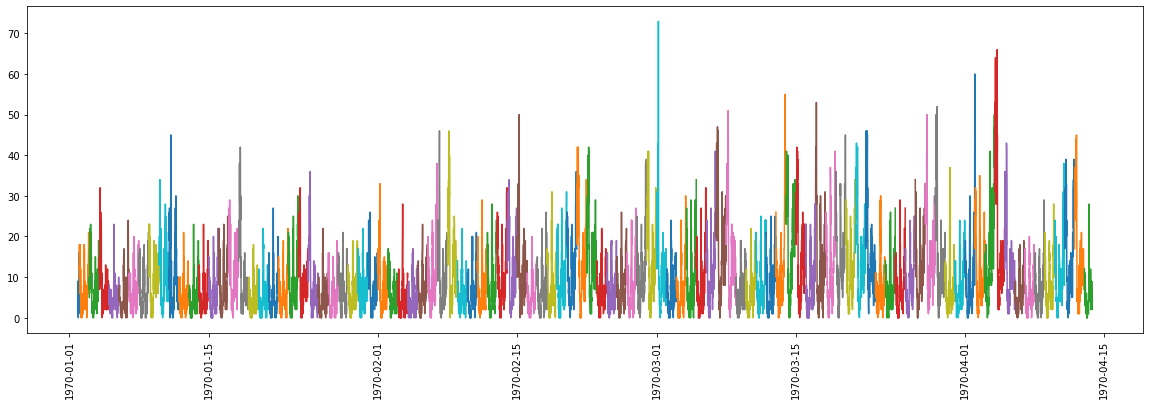

In [104]:
plt.figure(figsize=(20, 6))
groups = agg_logins.groupby(pd.Grouper(freq='D'))
for g in groups:
    plt.plot(g[1])
plt.xticks(rotation=90)
plt.show()

Our peaks are different colors, so I don't think we have anything conclusive about some days of the week being busier than others.

# 3. Problem Statement 2

> ### Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
>* 1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
>* 2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
    * *a) how you will implement the experiment
    * *b) what statistical test(s) you will conduct to verify the significance of the
observation
    * *c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

> Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do
not need this information to answer Part 2.


## 3.1 Choose key measures of success for Gotham/Metropolis crossover experiment

I think the first key metric is to see how many times drivers drive trips from one city to the other.  This will tap into the demand of riders to get back and forth between Gotham and Metropolis, which Ultimate is apparently not largely participating in at the current time.

A second key metric is to see how many days each driver is servicing both cities.  So if a driver drives 100 fares in Gotham and 0 in Metropolis, she is exclusive to Gotham.  Another driver who is driving 39 in Gotham and 50 in Metropolis is available in both cities, but not making as many paid drives.

A third, and most important, key metric would be to compare the driver's revenue, company costs and net income to Ultimate before the experiment against his revenue, Ultimate costs and Ultimate income during the experiment.  Those who don't change their habits would form a de facto voluntary control group.  Those who do would form the de facto test group and we can see if Ultimate gains enough new revenue to overcome the increased costs of the tolls.

Unfortunately, this database does not have that information available.  It appears to have one row per driver and each driver is assigned to only one city.  Furthermore, it doesn't seem to have any fare, revenue or income data.  It is impossible to glean any of the key metrics from this data.

## 3.2 Describe the crossover experiment

* 1. Get the necessary data
    * A. Get, or begin collecting, data at the trip level to get revenue, toll costs, and trip origin and destination:
        * Trip Origin, Trip Destination, Fare Collected, Tolls Re-imbursed, Gross Trip Income
    * B. If this data is not already available, operate for a month without reimbursement for tolls to get "before" data.
    * C. If data is available, then compile it from the last several months, and notify the drivers and start the experiment.
    
* 2. Conduct the experiement
    * A. Set and communicate a clear policy.  
        * Do we reimburse tolls when drivers drive empty? 
        * Do we reimburse when crossing the bridge to answer a call on the other side?
        * Or just when crossing the bridge with a paying fare?
    * B. Encourage drivers to take passengers from one city to another and if it's slow on one side of the bridge, start answering calls on the other side.
    * C. Run experiment for a sizable length of time, probably a month or two or three.
* 3. Analyze the data
    * A. Overall Ultimate Metropolis and Gotham:
        * Did we make more trips, increase utilization of drivers, increase market share vs. the "before" data?
    * B. For the test group, drivers who worked both cities more:
        * 1. Did they bring in more revenue?
        * 2. Did they increase income for themselves?
        * 3. Did we increase Ultimate's gross income (company revenue - toll costs)
    * C. For the "control" group, drivers who did not change their behavior:
        * 1. Did their revenue change?  (Perhaps tourism or business cycles had an independent effect)
        * 2. Did their personal income change?
        * 3. Did Ultimate's gross income from these drivers change (company revenue)
* 4. Statistical analyses
    * A. Do 3 hypothesis tests on 4 distributions of daily revenues and incomes:
        * 1. Test group (drivers who crossed the bridge more) during experiment vs. Test group before experiment
        * 2. Test group during experiment vs. Control group (drivers who did not cross bridge much) during experiment
        * 3. Control group during experiment vs. Control group before
    * B. Statistically significant success is defined as
        * 1. Can reject the null hypothesis that the Test group did no better than the Control group during the experiment.
        * 2. Can reject the null hypothesis that the Test group did no better during experiment than before.
        * The third hypothesis test is interesting, but the first test is really the crucial one.
* 5. Assess success, no change, or a detrimental change
    * A. Did Ultimate increase its brand awareness or value?
    * B. Did Ultimate Metropolis and Gotham increase our market share?
    * C. Did Ultimate increase revenue for itself and its drivers in test vs. control group?  Was it statistically significant?
    * D. Did Ultimate increase income for itself after deducting the tolls in test vs. control group? Statistically significant?

# 4. Problem Statement 3

> Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

## 4.1 Load Driver Data

In [105]:
drive = pd.read_json('ultimate_data_challenge.json')

In [108]:
drive.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [109]:
drive.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [112]:
drive.sort_values('city')

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
49999,Astapor,0,2014-01-18,NaN,1.00,2014-04-20,Android,0.0,False,0.0,3.49,5.0
13706,Astapor,11,2014-01-22,4.9,1.04,2014-05-16,iPhone,7.1,False,57.1,4.51,4.9
13705,Astapor,0,2014-01-06,5.0,1.00,2014-03-30,iPhone,0.0,False,0.0,1.76,5.0
33004,Astapor,0,2014-01-25,4.9,1.03,2014-06-30,iPhone,5.3,False,47.4,3.64,4.3
33009,Astapor,1,2014-01-19,5.0,2.50,2014-02-02,iPhone,100.0,False,0.0,1.53,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14320,Winterfell,2,2014-01-19,5.0,1.00,2014-01-21,Android,0.0,True,50.0,0.69,5.0
14322,Winterfell,0,2014-01-11,5.0,1.00,2014-03-26,iPhone,0.0,False,100.0,0.27,5.0
32247,Winterfell,4,2014-01-14,3.3,1.00,2014-01-26,iPhone,0.0,True,25.0,10.53,5.0
14323,Winterfell,1,2014-01-03,5.0,1.00,2014-01-04,iPhone,0.0,False,100.0,9.86,5.0


In [113]:
drive.sort_index()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5
